## Centroid Models Assignment

In [1]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

**Take some time to explore the dataframe above.**

In [3]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


----------------------
## Objective: 
#### 1. Fit K-Means, 
#### 2. Find the optimal number of clusters using the elbow rule and plot the clusters.


It may be difficult to visualize clusters on dataframes with many features. To simplify the task, we can plot the clusters in 2-D, by creating a clustering model on the last two columns of the dataset. 

> **Note:** There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though it's **not a must** in the case because we take only the last two columns, and they have already have similar scale.


In [4]:
# Create a new dataframe with only last 2 columns
X = df.iloc[:, [3,4]].values

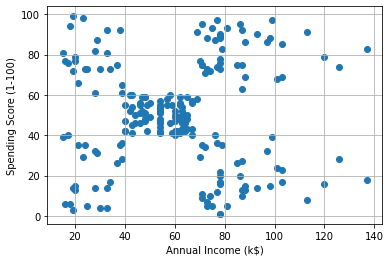

In [11]:
#Visualize the data points using a scatterplot
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show() 

In [12]:
#create a function to fit the model using different values of K from 1 to 15 using the elbow method
def fit_kmeans(X, max_k = 15):
    # create empty list for distortions
    distortions = []
    
    # create for loop to fit model for each k
    for i in range(1, max_k + 1):
        km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        km.fit(X)
        distortions.append(km.inertia_)
        
    # plot the elbow
    plt.plot(range(1, max_k + 1), distortions, marker = 'o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()


- elbow rule

/Users/patrickokwir/anaconda3/envs/{{Python-3.8}}/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/patrickokwir/anaconda3/envs/{{Python-3.8}}/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/patrickokwir/anaconda3/envs/{{Python-3.8}}/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/patrickokwir/anaconda3/envs/{{Python-3.8}}/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

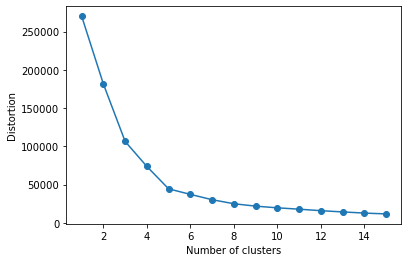

In [13]:
# plot elbow plot
fit_kmeans(X)
plt.show()


* fit model with optimal number of clusters

In [16]:
# fit model with 5 clusters
km5 = KMeans(n_clusters = 5, # number of clusters
             n_init = 5, # number of different times to run k-means, 5 beacuse we have 5 centroids from the elbow method
             random_state = 0) # determines random number generation for centroid initialization and random reassignment
y_means = km5.fit_predict(X)


* define function plot_clusters

In [17]:
# Visualize the clusters
# define the function to plot the clusters
def plot_clusters(X,y_res, plt_cluster_centers = False):
    # create scatterplot of dataframe
    plt.scatter(X[y_res == 0,0], X[y_res == 0,1], s = 50, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_res == 1,0], X[y_res == 1,1], s = 50, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_res == 2,0], X[y_res == 2,1], s = 50, c = 'green', label = 'Cluster 3')
    plt.scatter(X[y_res == 3,0], X[y_res == 3,1], s = 50, c = 'cyan', label = 'Cluster 4')
    plt.scatter(X[y_res == 4,0], X[y_res == 4,1], s = 50, c = 'magenta', label = 'Cluster 5')
    
    # plot the centroids
    if plt_cluster_centers:
        plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
        
    # set labels and legend
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.grid(True)
    plt.show()


* plot clusters

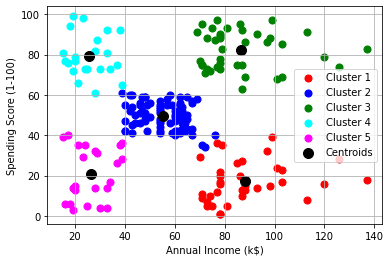

In [19]:
plot_clusters(X, y_means, plt_cluster_centers= True)

In [25]:
import seaborn as sns

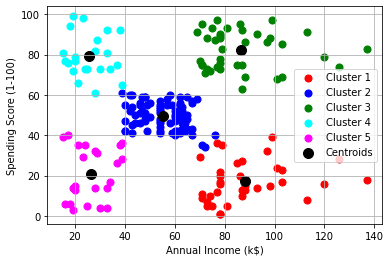

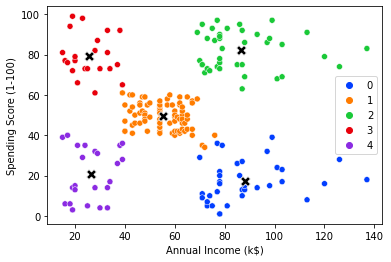

In [27]:
# The other plotting method coul be using seaborn

plot_clusters(X, y_means, plt_cluster_centers= True)
    # create scatterplot of dataframe and cluster centroids
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_means, palette = 'bright')
sns.scatterplot(x = km5.cluster_centers_[:,0], y = km5.cluster_centers_[:,1], color = 'black', marker = 'X', s = 100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

